<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
<center> <h3><b> Módulo 5 - Unidad 2</h3></b> </center>
<center> <h4><b>Machine Learning I - Algoritmos Supervisados</h4></b> </center>
<center> <h4><b> Caso práctico </h4></b> </center>

# Enunciado

El caso práctico consiste en encontrar un modelo supervisado capaz de clasificar correctamente el conjunto de datos `data_reto.csv`.

Para esto, te pedimos que entrenes distintas familias de modelos supervisados (vistas en esta unidad), donde en el caso de que sea posible presenta al menos 2 configuraciones distintas de la misma familia. Por ejemplo, 2 modelos de SVM cambiando el hiperparámetro C en la configuración.

Datos (disponibles en carpeta recursos M5): `data_reto.csv`, `data_onu.csv`

## **1. Importa las librerías necesarias**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

plt.style.use('ggplot')

## **2. Cargar el dataset**

In [36]:
orig_aed_data = pd.read_csv("data_reto.csv", header=0)
orig_aed_data.shape

(9146, 31)

In [37]:
orig_aed_data.head()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,360.08,42.933,60,135,0.109620,0.15281,1.75,812,0.23413,0.65476,...,0.52618,0.003299,0.258,0.48395,2.1362,49.342,19.25,73.75,8.0208,0
1,333.41,54.733,120,150,0.149490,0.19259,2.25,740,-0.64581,0.45448,...,0.61896,0.002891,0.220,0.32814,1.5259,28.785,45.00,89.25,25.8700,0
2,359.18,46.600,90,180,0.169420,0.23900,3.00,606,0.26447,0.61511,...,0.56023,0.005732,0.302,0.34270,1.8921,32.381,28.50,78.25,13.4750,0
3,416.67,41.867,0,135,0.119590,0.15029,1.75,816,0.65061,0.65536,...,0.50644,0.003233,0.288,0.47740,1.8311,16.677,28.50,77.50,13.6130,0
4,544.08,49.333,120,120,0.099658,0.16490,2.00,792,-0.14313,0.61120,...,0.28983,0.003547,0.266,0.48095,2.0142,12.484,24.75,74.75,10.5270,0


### 2.1 Variables

El dataset consiste en un conjunto de 30 parámetros calculados a partir del Electrocardiograma (ECG). Estos parámetros, recogen distintas características del ECG, desde su comportamiento temporal como a amplitud, pendiente, etc. Hasta carácterísticas un poco más complejas como variables espectrales. A continuación, se muestra la lista completa de parámetros:

**Parámetros temporales**

* TCI = threshold crossing interval

* TCSC = threshold crossing sample count

* Exp = exponencial estandard

* Expmod = exponencial modificada

* MAV = valor medio absoluto

* count1

* count2

* count3

* x1

* x2

* bCP

**Parámetros espectrales**

* vFleak = VF filter

* M

* A1

* A2

* A3

* x3

* x4

* x5

* bWT

**Parámetros de tipo tiempo-frecuencia**

* Li = basada en el análisis de ondas del ECG.

**Parámetros de complejidad del ECG**

* CM = medida de la complejidad

* CVbin = covarianza

* abin = area

* Frqbin = frecuencia

* Kurt = Curtosis de una señal binaria extraída del ECG

* PSR = La reconstrucción del espacio de fase

* HILB = La transformación de Hilbert

* SamEn = Muestra de entropía



In [38]:
orig_aed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     9146 non-null   float64
 1   TCSC    9146 non-null   float64
 2   exp     9146 non-null   int64  
 3   expmod  9146 non-null   int64  
 4   cm      9146 non-null   float64
 5   cvbin   9146 non-null   float64
 6   frqbin  9146 non-null   float64
 7   abin    9146 non-null   int64  
 8   kurt    9146 non-null   float64
 9   vfleak  9146 non-null   float64
 10  M       9146 non-null   float64
 11  A1      9146 non-null   float64
 12  A2      9146 non-null   float64
 13  A3      9146 non-null   float64
 14  mav     9146 non-null   float64
 15  psr     9146 non-null   float64
 16  hilb    9146 non-null   float64
 17  SamEn   9146 non-null   float64
 18  x3      9146 non-null   float64
 19  x4      9146 non-null   int64  
 20  x5      9146 non-null   float64
 21  x1      9146 non-null   float64
 22  

No hay valores nulos en el dataset.

In [39]:
orig_aed_data.isnull().sum()

TCI       0
TCSC      0
exp       0
expmod    0
cm        0
cvbin     0
frqbin    0
abin      0
kurt      0
vfleak    0
M         0
A1        0
A2        0
A3        0
mav       0
psr       0
hilb      0
SamEn     0
x3        0
x4        0
x5        0
x1        0
x2        0
bCP       0
bWT       0
bW        0
Li        0
count1    0
count2    0
count3    0
VF        0
dtype: int64

### 2.2 Variable de salida

La variable que utilizaremos para clasificar los datos será **VF**. Donde:
- 0 nos indica que la persona está sana
- 1 nos indica que la persona tiene una Fibrilación Ventricular (VF).



In [40]:
orig_aed_data["VF"].value_counts()

0    7590
1    1556
Name: VF, dtype: int64

Tenemos un 83% de personas sanas, y un 17% de personas que presentan una Fibrilación Ventricular.

In [41]:
orig_aed_data["VF"].value_counts(normalize = True)

0    0.829871
1    0.170129
Name: VF, dtype: float64

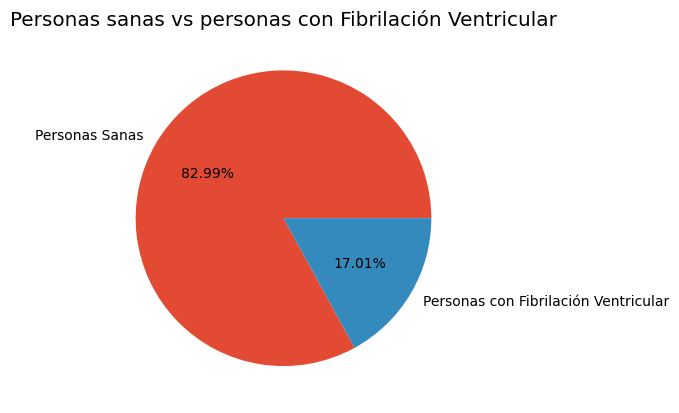

In [42]:
# Define data
vf = orig_aed_data["VF"].value_counts(normalize = True)
data = [ vf[0], vf[1]]

# Create pie chart
labels = ["Personas Sanas","Personas con Fibrilación Ventricular"]
plt.pie(data, labels = labels, autopct='%.2f%%')
plt.title("Personas sanas vs personas con Fibrilación Ventricular")
plt.show()

En este caso se observa que solo el 17% de la población presentan una Fibrilación Ventricular. Esta es una situación bastante común en datasets relacionados a problemas médicos. Tenemos un conjunto de datos desbalanceados, por lo que más adelante probaremos con algoritmos de clasificación que incluyan técnicas de regularización.



## **3. Analizar el dataset**
Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

In [43]:
orig_aed_data.describe()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
count,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,...,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,504.320221,26.311054,86.337743,145.712880,0.153696,0.182451,2.793489,727.499344,6.194699,0.709490,...,0.524501,0.064652,0.581557,0.234248,5.008640,25.916175,24.271731,74.598759,11.240366,0.170129
std,262.511975,20.286627,74.512381,66.011499,0.055616,0.063978,1.310632,126.400750,5.669886,0.167951,...,0.195080,0.066675,0.261768,0.183484,2.433811,19.471469,9.173761,14.051281,8.418466,0.375767
min,121.520000,2.266700,0.000000,15.000000,0.029897,0.015760,0.000000,500.000000,-1.618400,0.114860,...,0.103090,0.000227,0.030000,0.013999,0.244140,1.004900,9.500000,39.500000,1.999400,0.000000
25%,297.872500,10.533000,30.000000,90.000000,0.109620,0.152180,1.750000,624.000000,0.690283,0.662507,...,0.388305,0.010427,0.346000,0.096473,3.356900,9.047500,17.750000,64.000000,5.608250,0.000000
50%,436.110000,17.333000,75.000000,135.000000,0.149490,0.202680,2.500000,718.000000,6.123800,0.771580,...,0.499795,0.047565,0.662000,0.177870,5.188000,22.549000,22.750000,72.500000,8.789250,0.000000
75%,631.140000,42.450250,120.000000,195.000000,0.189350,0.234860,3.750000,813.000000,9.218200,0.824950,...,0.621315,0.088832,0.796000,0.327258,6.713900,38.808500,27.750000,83.500000,13.360000,0.000000
max,1861.200000,83.867000,450.000000,375.000000,0.358770,0.250250,8.750000,984.000000,57.369000,0.917030,...,0.993650,0.323140,0.948000,1.084600,11.536000,103.180000,83.000000,123.750000,78.707000,1.000000


Encontramos que las variables predictoras no están estandarizadas. Los algoritmos de SVM tienen un mejor funcionamiento cuando las variables predictoras están estandarizadas, por lo que en los próximos pasos realizaremos la transformación.

Tenemos un total de 30 variables predictoras, un número bastante alto de variables. Vamos a hacer un análisis de las correlaciones de estas variables.

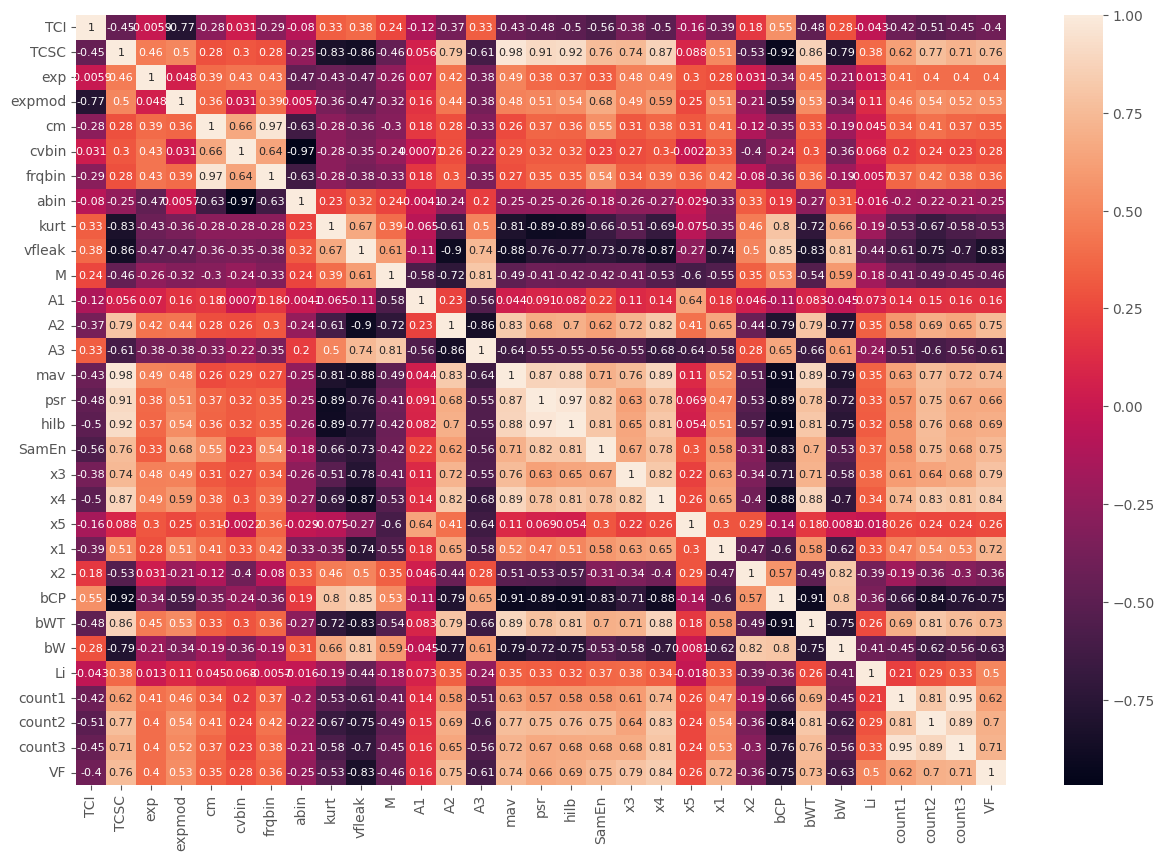

In [44]:
plt.figure(figsize=(15,10))
corrMatrix = orig_aed_data.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"fontsize":8})
plt.show()

Vemos varias variables correlacionadas entre sí, con valores por encima de 0.6 y por debajo de -0.6.

En la siguiente sección vamos a reducir el número de variables, no queremos que exista colinealidad entre variables independientes.


### 3.1 Selección de características

Dado que tenemos 30 variables predictoras, vamos a usar el método de sklearn llamado `VarianceThreshold` para reducirlas.

Este método elimina todas las características cuya varianza no alcanza algún umbral. De forma predeterminada, elimina todas las características de varianza cero, es decir, las características que tienen el mismo valor en todas las muestras.


In [45]:
vth_selector = VarianceThreshold(threshold = 0.25)
X_new = vth_selector.fit_transform(orig_aed_data)

print("Número de Características Originales:", orig_aed_data.shape[1])
print("Número de Características Finales:", X_new.shape[1])
print("\nCaracterísticas Originales:", list(orig_aed_data.columns))
print("Características Finales:", orig_aed_data.columns[vth_selector.get_support(indices=True)])

Número de Características Originales: 31
Número de Características Finales: 16

Características Originales: ['TCI', 'TCSC', 'exp', 'expmod', 'cm', 'cvbin', 'frqbin', 'abin', 'kurt', 'vfleak', 'M', 'A1', 'A2', 'A3', 'mav', 'psr', 'hilb', 'SamEn', 'x3', 'x4', 'x5', 'x1', 'x2', 'bCP', 'bWT', 'bW', 'Li', 'count1', 'count2', 'count3', 'VF']
Características Finales: Index(['TCI', 'TCSC', 'exp', 'expmod', 'frqbin', 'abin', 'kurt', 'M', 'A3',
       'x4', 'x5', 'bW', 'Li', 'count1', 'count2', 'count3'],
      dtype='object')


El nuevo dataset reducido a 16 variables es:

In [46]:
aed_data = orig_aed_data[orig_aed_data.columns[vth_selector.get_support(indices=True)]]
aed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     9146 non-null   float64
 1   TCSC    9146 non-null   float64
 2   exp     9146 non-null   int64  
 3   expmod  9146 non-null   int64  
 4   frqbin  9146 non-null   float64
 5   abin    9146 non-null   int64  
 6   kurt    9146 non-null   float64
 7   M       9146 non-null   float64
 8   A3      9146 non-null   float64
 9   x4      9146 non-null   int64  
 10  x5      9146 non-null   float64
 11  bW      9146 non-null   float64
 12  Li      9146 non-null   float64
 13  count1  9146 non-null   float64
 14  count2  9146 non-null   float64
 15  count3  9146 non-null   float64
dtypes: float64(12), int64(4)
memory usage: 1.1 MB


In [47]:
aed_data.head()

,TCI,TCSC,exp,expmod,frqbin,abin,kurt,M,A3,x4,x5,bW,Li,count1,count2,count3
0,360.08,42.933,60,135,1.75,812,0.23413,2.0421,1.36910,12,1.8930,2.1362,49.342,19.25,73.75,8.0208
1,333.41,54.733,120,150,2.25,740,-0.64581,1.3178,0.51023,14,2.6258,1.5259,28.785,45.00,89.25,25.8700
2,359.18,46.600,90,180,3.00,606,0.26447,2.0970,1.39090,9,1.8930,1.8921,32.381,28.50,78.25,13.4750
3,416.67,41.867,0,135,1.75,816,0.65061,1.7065,0.83470,9,2.0151,1.8311,16.677,28.50,77.50,13.6130
4,544.08,49.333,120,120,2.00,792,-0.14313,1.9452,1.15410,10,1.8930,2.0142,12.484,24.75,74.75,10.5270


Volvemos a generar de nuevo la matriz de correlación:

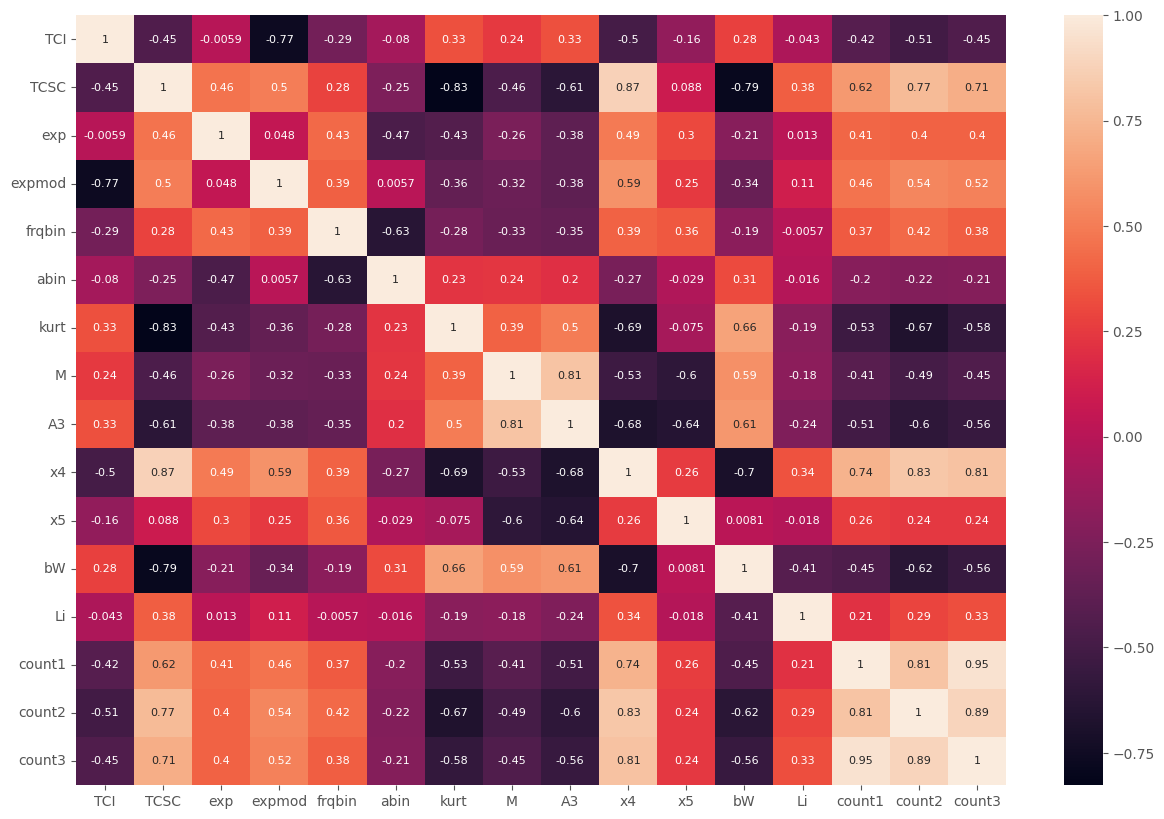

In [48]:
plt.figure(figsize=(15,10))
corrMatrix = aed_data.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"fontsize":8})
plt.show()

### 3.2 Análisis descriptivo

Representa visualmente los datos de manera que:
- Cada punto simbolice una persona
- Un punto es amarillo si la persona tiene Fibrilación Ventricular, y azul si no lo es
- Los ejes x e y representan dos variables que queramos comparar

Graficamos las relaciones entre algunas de las variables, y respecto a VF.

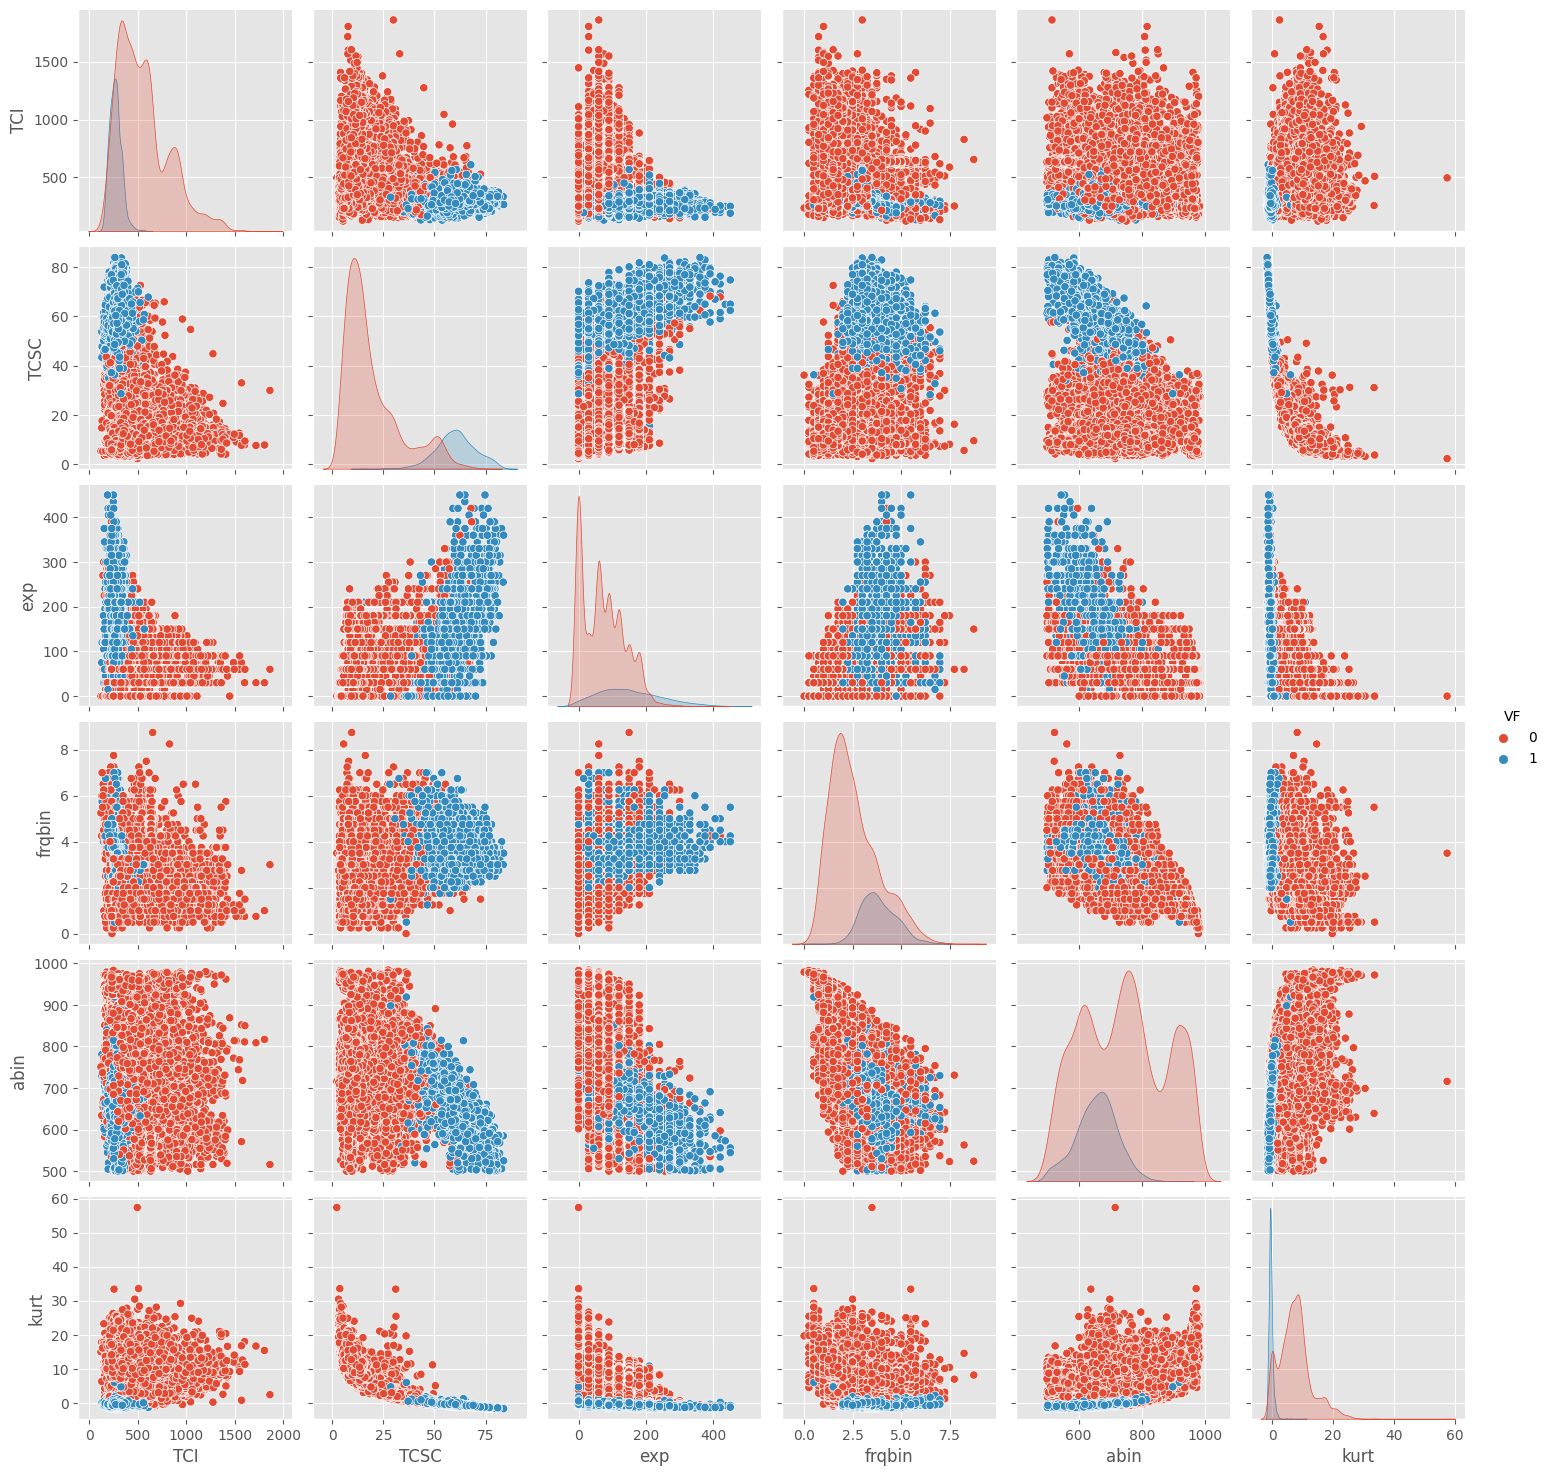

In [49]:
data = orig_aed_data[['TCI','TCSC','exp','frqbin','abin','kurt','VF']]
sns.pairplot(data, hue='VF')
plt.show()

Con una muestra de algunas variables relevantes, observamos que la población de personas con Fibrilación Ventricular están concentradas en un mismo patrón de medida al realizar comparaciones de 2 variables independientes.

**Comparamos TCI con exp:**

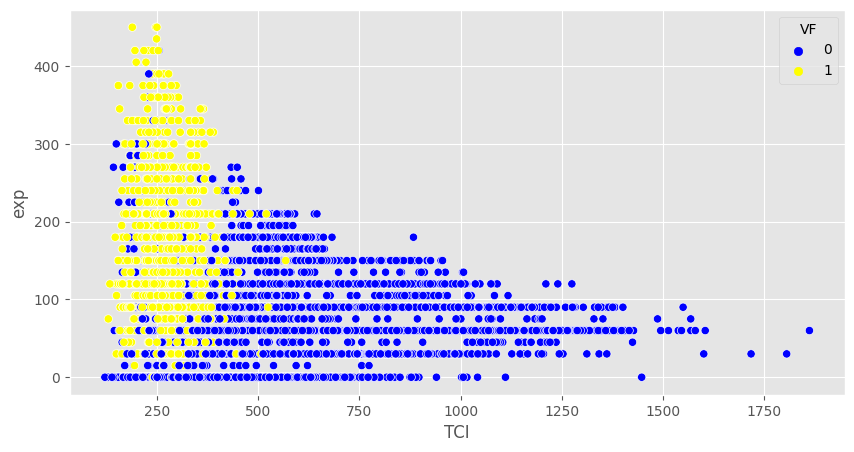

In [50]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=orig_aed_data, x='TCI', y='exp', hue='VF',
                palette=['blue','yellow'])
plt.show()

La relación TCI con exp, nos muestra que la población con Fibrilación Ventricular se encuentra concentrada en bajos valores de TCI para cualquier valor de exp.

**Comparamos TCI con frqbin:**

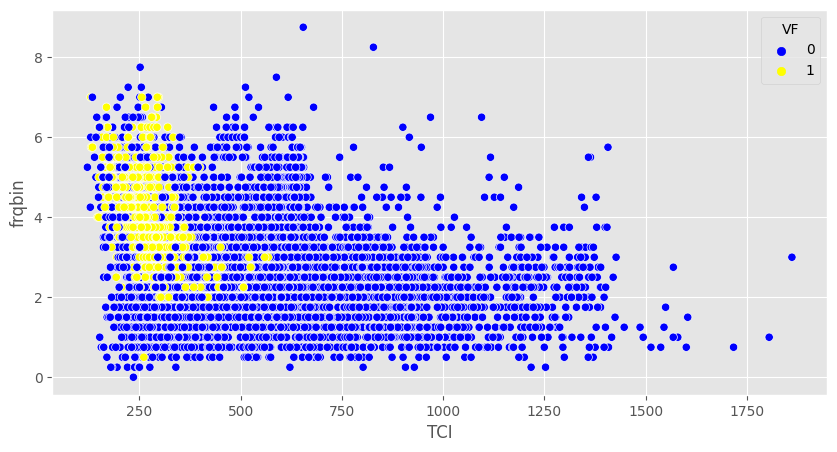

In [51]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=orig_aed_data, x='TCI', y='frqbin', hue='VF',
                palette=['blue','yellow'])
plt.show()

La relación TCI con frqbin, nos muestra que la población con Fibrilación Ventricular se encuentra concentrada en bajos valores de TCI y valores medios y altos de frqbin.

**Comparamos TCSC con exp:**

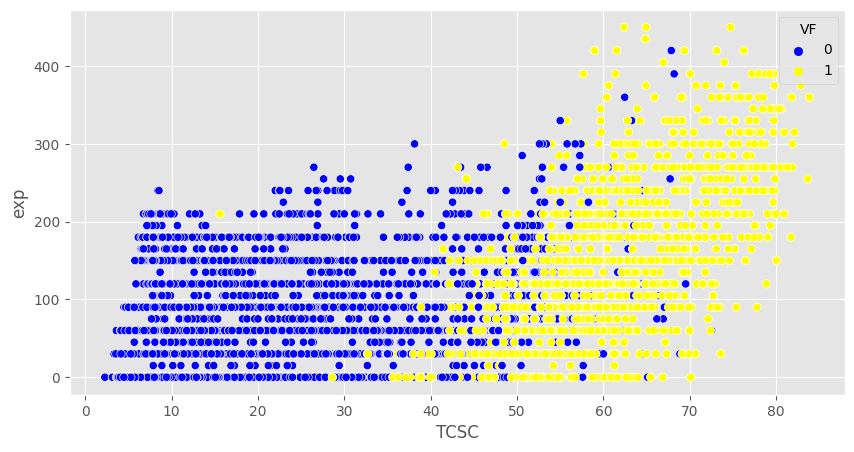

In [52]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=orig_aed_data, x='TCSC', y='exp', hue='VF',
                palette=['blue','yellow'])
plt.show()

La relación TCSC con exp, nos muestra que la población con Fibrilación Ventricular se encuentra concentrada en altos valores de TCSC a lo largo de todos los valores de exp.

**Comparamos TCI con kurt:**

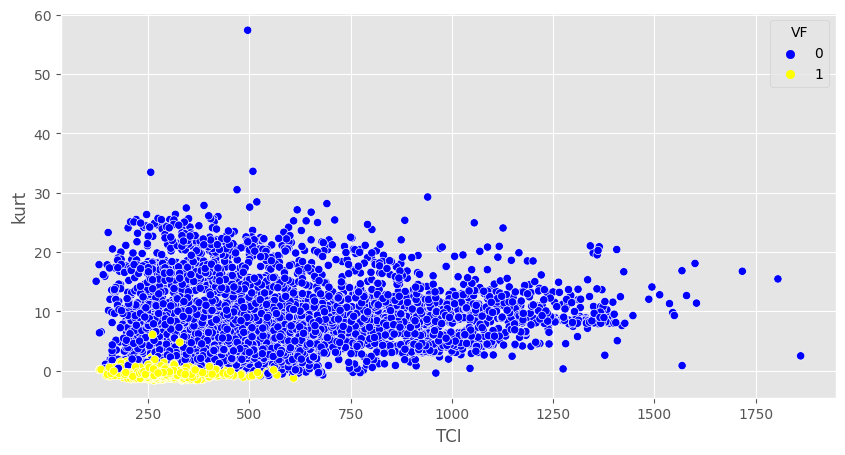

In [53]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=orig_aed_data, x='TCI', y='kurt', hue='VF',
                palette=['blue','yellow'])
plt.show()

La relación TCSC con kurt, nos muestra que la población con Fibrilación Ventricular se encuentra concentrada en bajos valores de TCSC y bajísimos valores de kurt.

En general, de las gráficas anteriores podemos ver que por cada una de las mediciones registradas, todas las personas con Fibrilación Ventricular se encuentran en un rango de valores similares para esa medición, respecto a las personas sanas.

## **4. Entrenamiento de los modelos**

Crea un conjunto de datos de entrenamiento y un conjunto de datos de test.

Intrucciones:

- seed: esta variable será igual la suma de las fechas de cumpleaños de los participantes.

- test_size: no se permite usar más del 20% de datos para crear el test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    aed_data,
    orig_aed_data['VF'],
    test_size = 0.20,
    random_state = 2600)


Usamos la función `StandardScaler()` para estandarizar nuestras variables predictoras.

In [55]:
# Estandarizar los datos

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.mean(), X_train.std() , X_test.mean(), X_test.std()

(2.7801101436758976e-17, 1.0, 0.0023212647022404142, 1.0051371935617106)

Las métricas que vamos a obtener de cada clasificador, son las siguientes:

*   **Exactitud (accuracy):** Es la proporción de predicciones correctas respecto al total de predicciones realizadas. Se calcula como el número de predicciones correctas dividido entre el número total de predicciones.
*   **Precisión (precision):** Es la proporción de predicciones positivas que son verdaderas positivas respecto a todas las predicciones positivas realizadas. Se calcula como el número de verdaderos positivos dividido entre el número de verdaderos positivos más falsos positivos.
*   **Recuperación (recall):** Es la proporción de verdaderos positivos que son detectados como positivos respecto a todos los verdaderos positivos que existen en el conjunto de datos. Se calcula como el número de verdaderos positivos dividido entre el número de verdaderos positivos más falsos negativos.
*   **Puntuación F1 (F1 score):** Es la media armónica entre precisión y recuperación. Se calcula como 2 veces el producto de precisión y recuperación dividido entre la suma de precisión y recuperación.

Para ellos creamos la siguiente función.

In [56]:
def print_metrics(y_pred_result):
  print("Accuracy:", "{:10.4f}".format(accuracy_score(y_test, y_pred_result, normalize=True)))
  print("Precision:", "{:10.4f}".format(precision_score(y_test, y_pred_result)))
  print("Recall:", "{:10.4f}".format(recall_score(y_test, y_pred_result)))
  print("\n", classification_report(y_test, y_pred_result))

**Crea el clasificador y entrénalo**

El primer clasificador que vamos a usar es **Regresión Logística**, se usa principalmente en problemas de clasificación entre dos clases o clasificación binaria. Su fácil implementación e interpretabilidad lo convierten en el modelo de referencia al momento de atacar cualquier problema de clasificación.

In [57]:
# Inicializar el modelo usando los parámetros predeterminados
logreg = LogisticRegression(C=5, max_iter=500, random_state = 2600)

# Ajustar el modelo a los datos
logreg.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=500, random_state=2600)

Predecir resultados y determinar acierto. ¡Consigue la mayor precisión posible!

In [58]:
# Predecir para el dataset de Test

y_pred_logreg = logreg.predict(X_test)

# Información del modelo
print_metrics(y_pred_logreg)

Accuracy:     0.9831
Precision:     0.9497
Recall:     0.9527

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1513
           1       0.95      0.95      0.95       317

    accuracy                           0.98      1830
   macro avg       0.97      0.97      0.97      1830
weighted avg       0.98      0.98      0.98      1830



Obtenemos un Accuracy del modelo del **98,31%**.

## **5. Mejorar la predicción**

¿Crees que puedes mejorar la predicción?

Puedes intentar:

- Optimizar los parámetros del clasificador
- Prueba entrenar otro tipo de clasificador

Vamos a intentar con diferentes parámetros de Regresión Logística, usando el **solver saga**, es una variación de sag (Stochastic Average Gradient), más rápido que otros solvers para datasets grandes tanto en el tamaño de la muestra, como en el número de features o características.

Sag solo soporta la técnica de regularización (penalty) L2 Ridge, y Saga soporta L1 Lasso y L2 Ridge, **vamos a usar L2, y agregamos multi_class ovr más adecuado a problemas binarios**.

In [59]:
# Inicializar el modelo usando los parámetros predeterminados
logreg_saga = LogisticRegression(solver='saga', C=2, penalty='l2', multi_class='ovr',
                                 random_state = 2600, max_iter=1000)

# Ajustar el modelo a los datos
logreg_saga.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, multi_class='ovr', random_state=2600,
                   solver='saga')

Predecir resultados y determinar acierto. ¡Consigue la mayor precisión posible!

In [60]:
# Predecir para el dataset de Test

y_pred_saga = logreg_saga.predict(X_test)

# Información del modelo
print_metrics(y_pred_saga)

Accuracy:     0.9831
Precision:     0.9497
Recall:     0.9527

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1513
           1       0.95      0.95      0.95       317

    accuracy                           0.98      1830
   macro avg       0.97      0.97      0.97      1830
weighted avg       0.98      0.98      0.98      1830



Con la variación de parámetros **obtenemos las mismas métricas que con la aplicación de LogisticRegression con el solver por default lbfgs**. Las métricas de precisión son bastante altas, por lo que nuevos rounds de ejecución no varían mucho las métricas.

Vamos a intentar con un segundo clasificador, SVM lineal inicialmente, y luego no lineal.

In [61]:
svm_linear = svm.SVC(kernel='linear', probability=True, random_state=2600)

svm_linear.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=2600)

Predecir resultados y determinar acierto. ¡Consigue la mayor precisión posible!

In [62]:
# Predecir para el dataset de Test

y_pred_svm_linear = svm_linear.predict(X_test)

# Información del modelo
print_metrics(y_pred_svm_linear)

Accuracy:     0.9820
Precision:     0.9522
Recall:     0.9432

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1513
           1       0.95      0.94      0.95       317

    accuracy                           0.98      1830
   macro avg       0.97      0.97      0.97      1830
weighted avg       0.98      0.98      0.98      1830



Con **SVM lineal** obtenemos métricas muy cercanas a los rounds de entrenamiento con **LogisticRegression**.

Ahora probamos SVM no lineal.

In [63]:
svm_rbf = svm.SVC(kernel="rbf", gamma=0.1, probability=True, random_state=2600)

svm_rbf.fit(X_train, y_train)

SVC(gamma=0.1, probability=True, random_state=2600)

In [64]:
# Predecir para el dataset de Test

y_pred_svm_rbf = svm_rbf.predict(X_test)

# Información del modelo
print_metrics(y_pred_svm_rbf)

Accuracy:     0.9913
Precision:     0.9718
Recall:     0.9779

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1513
           1       0.97      0.98      0.97       317

    accuracy                           0.99      1830
   macro avg       0.98      0.99      0.98      1830
weighted avg       0.99      0.99      0.99      1830



La precisión más alta la hemos logrado con **SVM kernel RBF (Radial Basis Function)** con un Accuracy de **99,13%**.



##**EVALUACIÓN**
Cuando termines el reto, calcula los siguientes valores para el modelo que mejor predicción obtuviste:
- BER

In [65]:
### NO MODIFICAR

def eval_predict(model_name, X_train):
  import sklearn.metrics as metrics
  data_onu = pd.read_csv('data_onu.csv')

  # list of features
  features = X_train.columns

  X_onu = data_onu.drop('VF',axis=1)
  y_onu = data_onu['VF']

  y_pred_onu = model_name.predict(X_onu[features].values)

  BER = 1 - metrics.balanced_accuracy_score(y_onu, y_pred_onu)
  #variables = len(features)
  #print(BER*100)
  #print(variables)

  return BER

In [66]:
X_train_df = pd.DataFrame(X_train,
             columns=['TCI', 'TCSC', 'exp', 'expmod', 'frqbin', 'abin', 'kurt', 'M', 'A3',
       'x4', 'x5', 'bW', 'Li', 'count1', 'count2', 'count3'])
X_train_df.shape

(7316, 16)

In [67]:
# Ejemplo:
# Cambia model_name por el nombre del modelo que mejor resultado obtuviste

print("Logistic Regression:", "{:10.4f}".format(eval_predict(logreg, X_train_df)))
print("Logistic Regression Saga:", "{:10.4f}".format(eval_predict(logreg_saga, X_train_df)))
print("SVM lineal:", "{:10.4f}".format(eval_predict(svm_linear, X_train_df)))
print("SVM no lineal:", "{:10.2f}".format(eval_predict(svm_rbf, X_train_df)))


Logistic Regression:     0.4333
Logistic Regression Saga:     0.4333
SVM lineal:     0.2235
SVM no lineal:       0.50


Por último generamos gráficas de **Decision Boundaries** para cada uno de los algoritmos entrenados, sobre 2 variables de muestra.

Estos gráficos nos dan una idea de las decisiones que han tomado los algoritmos a la hora de clasificar un dato particular en una clase, en este caso VF, personas sanas vs personas con Fibrilación Ventricular.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


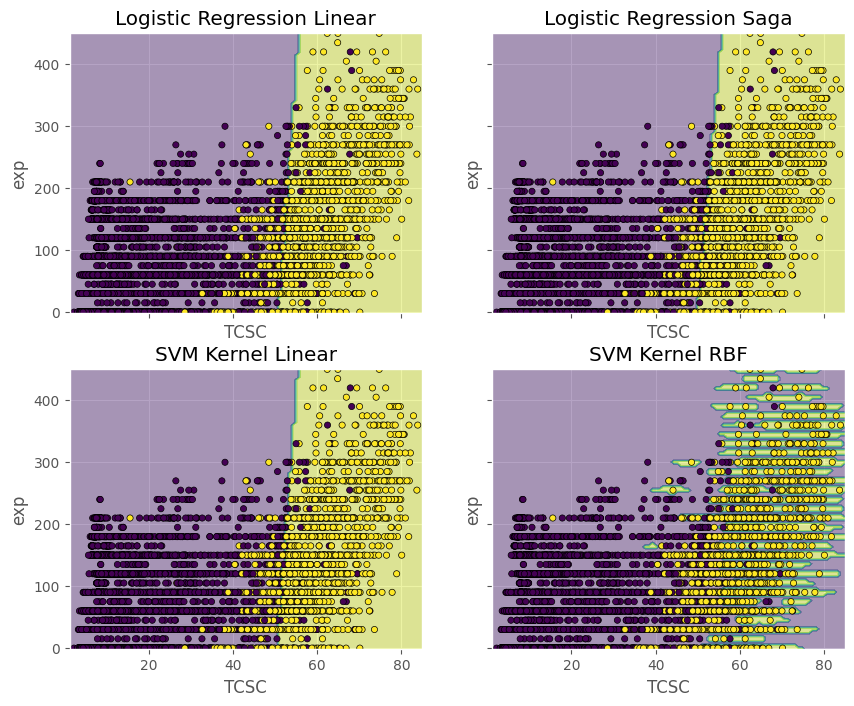

In [68]:
from itertools import product
from sklearn.inspection import DecisionBoundaryDisplay

# Loading some example data
X = aed_data[["TCSC", "exp"]]
y = orig_aed_data.VF

# Training classifiers
clf1 = LogisticRegression(C=5, max_iter=500, random_state = 2600)
clf2 = LogisticRegression(solver='saga', C=2, penalty='l2', multi_class='ovr',
                                 random_state = 2600, max_iter=1000)
clf3 = svm.SVC(kernel='linear', probability=True, random_state=2600)
clf4 = svm.SVC(kernel="rbf", gamma=0.1, probability=True, random_state=2600)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, clf4],
    ["Logistic Regression Linear", "Logistic Regression Saga",
     "SVM Kernel Linear", "SVM Kernel RBF"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()